In [ ]:
import pandas as pd
import glob
import os

In [ ]:
# Manually list your CSV files (2005–2025)
csv_files = [
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2005.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2006.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2007.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2008.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2009.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2010.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2011.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2012.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2013.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2014.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2015.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2016.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2017.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2018.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2019.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2020.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2021.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2022.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2023.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2024.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2025.csv"
]


# Read and merge all files
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    df["source_file"] = os.path.basename(file)  # optional
    dfs.append(df)

merged_full_df = pd.concat(dfs, ignore_index=True)

# Save merged file
output_path = "Project/Data/USA/Combined/TRDA_Gidxtrd_2005_2025_merged.csv"
merged_full_df.to_csv(output_path, index=False)

print(f"✅ Merged {len(csv_files)} files into one CSV: {output_path}")
print(f"Total rows: {len(merged_full_df):,}")


✅ Merged 12 files into one CSV: Project/Data/USA/Combined/TRDA_Gidxtrd_1991_2025_merged.csv
Total rows: 6,666,800


In [1]:
import os
import pandas as pd

# Manually list your CSV files (2005–2025)
csv_files = [
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2005.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2006.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2007.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2008.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2009.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2010.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2011.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2012.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2013.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2014.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2015.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2016.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2017.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2018.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2019.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2020.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2021.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2022.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2023.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2024.csv",
    "Project/Data/USA/Combined/TRDA_Gidxtrd_2025.csv"
]

def keep_fridays(df):
    """Robust: finde Datums-Spalte, parse, filtere Freitage."""
    # mögliche Datums-Spalten
    for col in ["Trddt", "Date", "date", "DATE"]:
        if col in df.columns:
            date_col = col
            break
    else:
        raise ValueError("Keine Datums-Spalte gefunden (erwartet: Trddt/Date).")

    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df = df.dropna(subset=[date_col])

    # Freitag = 4
    df = df[df[date_col].dt.weekday == 4].copy()
    return df, date_col

dfs = []
total_rows_before = 0
total_rows_after = 0

for file in csv_files:
    tmp = pd.read_csv(file)
    total_rows_before += len(tmp)
    tmp, date_col = keep_fridays(tmp)
    tmp["source_file"] = os.path.basename(file)
    total_rows_after += len(tmp)
    dfs.append(tmp)
    print(f"✔ {os.path.basename(file)}: {len(tmp):,} Freitag-Zeilen")

# zusammenführen
merged_fridays_df = pd.concat(dfs, ignore_index=True)

# optional: Spaltenauswahl/Umbenennung (falls gewünscht)
# z.B. nur diese behalten, wenn vorhanden:
cols_pref = [c for c in ["Indexcd", "IndexName", "Clsidx", "Trddt", "Date", "source_file"] if c in merged_fridays_df.columns]
merged_fridays_df = merged_fridays_df[cols_pref]

# speichern
output_path = "Project/Data/USA/Combined/TRDA_Gidxtrd_2005_2025_FRIDAYS_merged.csv"
merged_fridays_df.to_csv(output_path, index=False)

print("\n✅ Fertig gemerged (nur Freitage).")
print(f"   Gesamtzeilen vor Filter: {total_rows_before:,}")
print(f"   Gesamtzeilen nach Filter (Freitage): {total_rows_after:,}")
print(f"   Output: {output_path}")


✔ TRDA_Gidxtrd_2005.csv: 39,874 Freitag-Zeilen
✔ TRDA_Gidxtrd_2006.csv: 77,199 Freitag-Zeilen
✔ TRDA_Gidxtrd_2007.csv: 74,692 Freitag-Zeilen
✔ TRDA_Gidxtrd_2008.csv: 109,679 Freitag-Zeilen
✔ TRDA_Gidxtrd_2009.csv: 121,857 Freitag-Zeilen
✔ TRDA_Gidxtrd_2010.csv: 116,933 Freitag-Zeilen
✔ TRDA_Gidxtrd_2011.csv: 120,666 Freitag-Zeilen
✔ TRDA_Gidxtrd_2012.csv: 122,046 Freitag-Zeilen
✔ TRDA_Gidxtrd_2013.csv: 122,470 Freitag-Zeilen
✔ TRDA_Gidxtrd_2014.csv: 113,143 Freitag-Zeilen
✔ TRDA_Gidxtrd_2015.csv: 112,220 Freitag-Zeilen
✔ TRDA_Gidxtrd_2016.csv: 115,264 Freitag-Zeilen
✔ TRDA_Gidxtrd_2017.csv: 104,535 Freitag-Zeilen
✔ TRDA_Gidxtrd_2018.csv: 40,131 Freitag-Zeilen
✔ TRDA_Gidxtrd_2019.csv: 1,887 Freitag-Zeilen
✔ TRDA_Gidxtrd_2020.csv: 1,814 Freitag-Zeilen
✔ TRDA_Gidxtrd_2021.csv: 1,887 Freitag-Zeilen
✔ TRDA_Gidxtrd_2022.csv: 1,888 Freitag-Zeilen
✔ TRDA_Gidxtrd_2023.csv: 1,885 Freitag-Zeilen
✔ TRDA_Gidxtrd_2024.csv: 1,815 Freitag-Zeilen
✔ TRDA_Gidxtrd_2025.csv: 1,517 Freitag-Zeilen

✅ Fertig 

In [2]:
import pandas as pd

# Falls du vom vorherigen Schritt kommst:
# merged_fridays_df enthält bereits nur Freitage
# und hat eine Datums-Spalte "Trddt" ODER "Date".

# 1) Datums-Spalte ermitteln
date_col = "Trddt" if "Trddt" in merged_fridays_df.columns else "Date"
merged_fridays_df[date_col] = pd.to_datetime(merged_fridays_df[date_col], errors="coerce")

# 2) ISO-Jahr und ISO-KW berechnen
iso = merged_fridays_df[date_col].dt.isocalendar()  # gibt DataFrame mit year, week, day
merged_fridays_df["Year"] = iso["year"].astype(int)
merged_fridays_df["Week"] = iso["week"].astype(int)

# 3) Kombinierte Spalte wie im China-Datensatz: YYYY-WW (mit führender Null)
merged_fridays_df["Date"] = (
    merged_fridays_df["Year"].astype(str) + "-" + merged_fridays_df["Week"].astype(str).str.zfill(2)
)

# 4) Optional: sortieren und nur relevante Spalten behalten
keep_cols = [c for c in ["Indexcd","IndexName","Clsidx","Year","Week","Date",date_col,"source_file"] if c in merged_fridays_df.columns]
merged_fridays_df = merged_fridays_df.sort_values([date_col]).reset_index(drop=True)[keep_cols]

# 5) Optional: speichern
output_path_kw = "Project/Data/USA/Combined/TRDA_Gidxtrd_2005_2025_FRIDAYS_with_YW.csv"
merged_fridays_df.to_csv(output_path_kw, index=False)
print(f"Gespeichert: {output_path_kw}")

# kurze Kontrolle
print(merged_fridays_df.head(3))


Gespeichert: Project/Data/USA/Combined/TRDA_Gidxtrd_2005_2025_FRIDAYS_with_YW.csv
  Indexcd       IndexName   Clsidx  Year  Week     Date      Trddt  \
0     NYA  NYSE Composite  7057.51  2005     1  2005-01 2005-01-07   
1      SR             NaN   106.57  2005     1  2005-01 2005-01-07   
2      MA             NaN   195.00  2005     1  2005-01 2005-01-07   

             source_file  
0  TRDA_Gidxtrd_2005.csv  
1  TRDA_Gidxtrd_2005.csv  
2  TRDA_Gidxtrd_2005.csv  


In [4]:
friday_df = merged_fridays_df[['Indexcd','IndexName', 'Date', 'Clsidx']]
friday_df.head()

,Indexcd,IndexName,Date,Clsidx
0,NYA,NYSE Composite,2005-01,7057.51
1,SR,NaN,2005-01,106.57
2,MA,NaN,2005-01,195.00
3,TR,NaN,2005-01,313.28
4,XS,NaN,2005-01,167.58


In [67]:
# Suche nach allen Varianten des Nasdaq Composite
mask = friday_df['IndexName'].str.contains(r'NQ', case=False, na=False)

# Gefilterte Zeilen
nasdaq_composite_df = friday_df[mask].copy()

# Nur einzigartige Schreibweisen anzeigen
unique_names = nasdaq_composite_df['IndexName'].dropna().unique()

print(f"Gefundene Zeilen insgesamt: {len(nasdaq_composite_df)}")
print(f"Einzigartige Schreibweisen: {len(unique_names)}")
for name in sorted(unique_names):
    print(name)



Gefundene Zeilen insgesamt: 10003
Einzigartige Schreibweisen: 10
NQ Bank
NQ Biotechnology
NQ Computer
NQ Financial 100
NQ Industrial
NQ Insurance
NQ Internet
NQ Other Finance
NQ Telecommunications
NQ Transportation


In [78]:
import pandas as pd

# Liste der gewünschten Indizes
index_names = [
    'Nasdaq 100',
    'NQ Telecommunications',
    'NASDAQ Health Care',
    'NQ Transportation',
    'NQ Internet',
    'NQ Computer',
    'Nasdaq',
    'DJ Composite',
    'DJ Transportation',
    'DJ Health Care',
    'DJ Technology',
    'NQ Industrial'
]

# DataFrame mit Zuordnung IndexName ↔ Indexcd
indexcd_map = (
    friday_df[friday_df['IndexName'].isin(index_names)]
    .groupby('IndexName')['Indexcd']
    .unique()
    .reset_index()
)

# Listen schöner als kommagetrennten Text darstellen
indexcd_map['Indexcd'] = indexcd_map['Indexcd'].apply(lambda x: ', '.join(map(str, x)))

display(indexcd_map)


,IndexName,Indexcd
0,DJ Composite,DJC
1,DJ Health Care,DJUSHC
2,DJ Technology,DJUSTC
3,DJ Transportation,DJT
4,NASDAQ Health Care,IXHC
5,NQ Computer,IXK
6,NQ Industrial,IXID
7,NQ Internet,QNET
8,NQ Telecommunications,IXUT
9,NQ Transportation,IXTR


In [79]:
nasdaq100_df          = friday_df[friday_df['Indexcd'] == 'NDX']
nqtelecom_df          = friday_df[friday_df['Indexcd'] == 'IXUT']
nasdaqhealth_df       = friday_df[friday_df['Indexcd'] == 'IXHC']
nqtransportation_df   = friday_df[friday_df['Indexcd'] == 'IXTR']
djcomposite_df        = friday_df[friday_df['Indexcd'] == 'DJC']
djtransportation_df   = friday_df[friday_df['Indexcd'] == 'DJT']
djhealthcare_df       = friday_df[friday_df['Indexcd'] == 'DJUSHC']
djtechnology_df       = friday_df[friday_df['Indexcd'] == 'DJUSTC']
nqinternet_df         = friday_df[friday_df['Indexcd'] == 'QNET']
nasdaq100_df          = friday_df[friday_df['Indexcd'] == 'IXIC']
nasindustrial_df       = friday_df[friday_df['Indexcd'] == 'IXID']
nascomputer_df        = friday_df[friday_df['Indexcd'] == 'IXK']

In [80]:
# Definiere alle Indizes, die du vergleichen willst
index_names = [
    'Nasdaq 100',
    'NQ Telecommunications',
    'NASDAQ Health Care',
    'NQ Transportation',
    'DJ Composite',
    'DJ Transportation',
    'DJ Health Care',
    'DJ Technology',
    'NQ Internet',
    'Nasdaq',
    'NQ Industrial',
    'NQ Computer'
]

# Filtere nach dem Datum 2010-06-11 und zeige jede Teilmenge an
target_date = '2009-06'

for name in index_names:
    subset = friday_df[
        (friday_df['IndexName'] == name) &
        (friday_df['Date'] == target_date)
    ]
    print(f"\n📊 {name} — {len(subset)} Einträge am {target_date}:")
    display(subset)




📊 Nasdaq 100 — 1 Einträge am 2009-06:


,Indexcd,IndexName,Date,Clsidx
313785,NDX,Nasdaq 100,2009-06,1277.49



📊 NQ Telecommunications — 1 Einträge am 2009-06:


,Indexcd,IndexName,Date,Clsidx
313968,IXUT,NQ Telecommunications,2009-06,156.14



📊 NASDAQ Health Care — 1 Einträge am 2009-06:


,Indexcd,IndexName,Date,Clsidx
314599,IXHC,NASDAQ Health Care,2009-06,210.21



📊 NQ Transportation — 1 Einträge am 2009-06:


,Indexcd,IndexName,Date,Clsidx
313681,IXTR,NQ Transportation,2009-06,1742.35



📊 DJ Composite — 1 Einträge am 2009-06:


,Indexcd,IndexName,Date,Clsidx
315132,DJC,DJ Composite,2009-06,2935.88



📊 DJ Transportation — 1 Einträge am 2009-06:


,Indexcd,IndexName,Date,Clsidx
314370,DJT,DJ Transportation,2009-06,3203.74



📊 DJ Health Care — 1 Einträge am 2009-06:


,Indexcd,IndexName,Date,Clsidx
315352,DJUSHC,DJ Health Care,2009-06,276.86



📊 DJ Technology — 1 Einträge am 2009-06:


,Indexcd,IndexName,Date,Clsidx
313942,DJUSTC,DJ Technology,2009-06,389.57



📊 NQ Internet — 0 Einträge am 2009-06:


,Indexcd,IndexName,Date,Clsidx



📊 Nasdaq — 1 Einträge am 2009-06:


,Indexcd,IndexName,Date,Clsidx
314584,IXIC,Nasdaq,2009-06,1591.71



📊 NQ Industrial — 1 Einträge am 2009-06:


,Indexcd,IndexName,Date,Clsidx
314626,IXID,NQ Industrial,2009-06,1168.79



📊 NQ Computer — 1 Einträge am 2009-06:


,Indexcd,IndexName,Date,Clsidx
313880,IXK,NQ Computer,2009-06,723.09


In [81]:
for name in index_names:
    subset = friday_df[friday_df['IndexName'] == name]
    print(f"\n📊 {name} — erste 5 Zeilen:")
    display(subset.head(5))


📊 Nasdaq 100 — erste 5 Zeilen:


,Indexcd,IndexName,Date,Clsidx
84,NDX,Nasdaq 100,2005-01,1564.81
242,NDX,Nasdaq 100,2005-02,1561.11
432,NDX,Nasdaq 100,2005-03,1503.64
646,NDX,Nasdaq 100,2005-04,1499.46
798,NDX,Nasdaq 100,2005-05,1534.49



📊 NQ Telecommunications — erste 5 Zeilen:


,Indexcd,IndexName,Date,Clsidx
49,IXUT,NQ Telecommunications,2005-01,191.90
274,IXUT,NQ Telecommunications,2005-02,192.50
424,IXUT,NQ Telecommunications,2005-03,183.97
608,IXUT,NQ Telecommunications,2005-04,182.07
835,IXUT,NQ Telecommunications,2005-05,184.25



📊 NASDAQ Health Care — erste 5 Zeilen:


,Indexcd,IndexName,Date,Clsidx
5502,IXHC,NASDAQ Health Care,2005-31,211.45
5780,IXHC,NASDAQ Health Care,2005-32,210.28
7683,IXHC,NASDAQ Health Care,2005-34,207.93
10748,IXHC,NASDAQ Health Care,2005-35,213.17
13556,IXHC,NASDAQ Health Care,2005-36,219.18



📊 NQ Transportation — erste 5 Zeilen:


,Indexcd,IndexName,Date,Clsidx
5512,IXTR,NQ Transportation,2005-31,2165.39
5775,IXTR,NQ Transportation,2005-32,2178.94
7799,IXTR,NQ Transportation,2005-34,2129.50
10752,IXTR,NQ Transportation,2005-35,2174.16
13464,IXTR,NQ Transportation,2005-36,2161.48



📊 DJ Composite — erste 5 Zeilen:


,Indexcd,IndexName,Date,Clsidx
115,DJC,DJ Composite,2005-01,3304.14
357,DJC,DJ Composite,2005-02,3293.06
379,DJC,DJ Composite,2005-03,3239.05
621,DJC,DJ Composite,2005-04,3279.56
927,DJC,DJ Composite,2005-05,3365.25



📊 DJ Transportation — erste 5 Zeilen:


,Indexcd,IndexName,Date,Clsidx
25,DJT,DJ Transportation,2005-01,3636.78
204,DJT,DJ Transportation,2005-02,3534.15
540,DJT,DJ Transportation,2005-03,3471.17
669,DJT,DJ Transportation,2005-04,3545.94
925,DJT,DJ Transportation,2005-05,3597.81



📊 DJ Health Care — erste 5 Zeilen:


,Indexcd,IndexName,Date,Clsidx
7214,DJUSHC,DJ Health Care,2005-33,311.00
9848,DJUSHC,DJ Health Care,2005-34,307.63
12262,DJUSHC,DJ Health Care,2005-35,313.77
15690,DJUSHC,DJ Health Care,2005-36,321.46
16759,DJUSHC,DJ Health Care,2005-37,317.84



📊 DJ Technology — erste 5 Zeilen:


,Indexcd,IndexName,Date,Clsidx
6613,DJUSTC,DJ Technology,2005-33,493.45
7684,DJUSTC,DJ Technology,2005-34,491.43
10818,DJUSTC,DJ Technology,2005-35,495.01
13554,DJUSTC,DJ Technology,2005-36,505.42
16012,DJUSTC,DJ Technology,2005-37,502.40



📊 NQ Internet — erste 5 Zeilen:


,Indexcd,IndexName,Date,Clsidx
715298,QNET,NQ Internet,2012-24,221.27
717987,QNET,NQ Internet,2012-25,222.84
720056,QNET,NQ Internet,2012-26,225.81
722446,QNET,NQ Internet,2012-27,223.92
724822,QNET,NQ Internet,2012-28,218.15



📊 Nasdaq — erste 5 Zeilen:


,Indexcd,IndexName,Date,Clsidx
85,IXIC,Nasdaq,2005-01,2088.61
253,IXIC,Nasdaq,2005-02,2087.91
427,IXIC,Nasdaq,2005-03,2034.27
647,IXIC,Nasdaq,2005-04,2035.83
794,IXIC,Nasdaq,2005-05,2086.66



📊 NQ Industrial — erste 5 Zeilen:


,Indexcd,IndexName,Date,Clsidx
89,IXID,NQ Industrial,2005-01,1769.25
243,IXID,NQ Industrial,2005-02,1774.98
428,IXID,NQ Industrial,2005-03,1720.22
640,IXID,NQ Industrial,2005-04,1712.82
834,IXID,NQ Industrial,2005-05,1753.92



📊 NQ Computer — erste 5 Zeilen:


,Indexcd,IndexName,Date,Clsidx
70,IXK,NQ Computer,2005-01,924.84
241,IXK,NQ Computer,2005-02,923.86
423,IXK,NQ Computer,2005-03,902.74
611,IXK,NQ Computer,2005-04,913.97
803,IXK,NQ Computer,2005-05,939.43


In [82]:
for name in index_names:
    # Nach Index filtern
    subset = friday_df[friday_df['IndexName'] == name].copy()
    
    if subset.empty:
        print(f"\n⚠️ {name}: Keine Einträge gefunden.")
        continue

    # Spalte 'Date' im Format YYYY-WW -> in zwei Spalten Jahr und Woche zerlegen
    subset[['Year', 'Week']] = subset['Date'].astype(str).str.split('-', expand=True)
    subset['Year'] = subset['Year'].astype(int)
    subset['Week'] = subset['Week'].astype(int)
    
    # Nach Jahr und Woche sortieren
    subset = subset.sort_values(['Year', 'Week']).reset_index(drop=True)
    
    # Erstes und letztes Label (YYYY-WW)
    first_date = subset['Date'].iloc[0]
    last_date  = subset['Date'].iloc[-1]
    
    print(f"\n📊 {name}")
    print(f"   Erstes Date-Label (YYYY-WW): {first_date}")
    print(f"   Letztes Date-Label (YYYY-WW): {last_date}")
    print(f"   Zeilen insgesamt: {len(subset)}")
    
    # Vorschau
    display(subset.head(3))
    display(subset.tail(3))



📊 Nasdaq 100
   Erstes Date-Label (YYYY-WW): 2005-01
   Letztes Date-Label (YYYY-WW): 2025-43
   Zeilen insgesamt: 1047


,Indexcd,IndexName,Date,Clsidx,Year,Week
0,NDX,Nasdaq 100,2005-01,1564.81,2005,1
1,NDX,Nasdaq 100,2005-02,1561.11,2005,2
2,NDX,Nasdaq 100,2005-03,1503.64,2005,3


,Indexcd,IndexName,Date,Clsidx,Year,Week
1044,NDX,Nasdaq 100,2025-41,24221.75,2025,41
1045,NDX,Nasdaq 100,2025-42,24817.95,2025,42
1046,NDX,Nasdaq 100,2025-43,25358.16,2025,43



📊 NQ Telecommunications
   Erstes Date-Label (YYYY-WW): 2005-01
   Letztes Date-Label (YYYY-WW): 2025-43
   Zeilen insgesamt: 1048


,Indexcd,IndexName,Date,Clsidx,Year,Week
0,IXUT,NQ Telecommunications,2005-01,191.90,2005,1
1,IXUT,NQ Telecommunications,2005-02,192.50,2005,2
2,IXUT,NQ Telecommunications,2005-03,183.97,2005,3


,Indexcd,IndexName,Date,Clsidx,Year,Week
1045,IXUT,NQ Telecommunications,2025-41,493.66,2025,41
1046,IXUT,NQ Telecommunications,2025-42,501.56,2025,42
1047,IXUT,NQ Telecommunications,2025-43,493.88,2025,43



📊 NASDAQ Health Care
   Erstes Date-Label (YYYY-WW): 2005-31
   Letztes Date-Label (YYYY-WW): 2025-43
   Zeilen insgesamt: 1016


,Indexcd,IndexName,Date,Clsidx,Year,Week
0,IXHC,NASDAQ Health Care,2005-31,211.45,2005,31
1,IXHC,NASDAQ Health Care,2005-32,210.28,2005,32
2,IXHC,NASDAQ Health Care,2005-34,207.93,2005,34


,Indexcd,IndexName,Date,Clsidx,Year,Week
1013,IXHC,NASDAQ Health Care,2025-41,1046.95,2025,41
1014,IXHC,NASDAQ Health Care,2025-42,1076.56,2025,42
1015,IXHC,NASDAQ Health Care,2025-43,1103.09,2025,43



📊 NQ Transportation
   Erstes Date-Label (YYYY-WW): 2005-31
   Letztes Date-Label (YYYY-WW): 2025-43
   Zeilen insgesamt: 1018


,Indexcd,IndexName,Date,Clsidx,Year,Week
0,IXTR,NQ Transportation,2005-31,2165.39,2005,31
1,IXTR,NQ Transportation,2005-32,2178.94,2005,32
2,IXTR,NQ Transportation,2005-34,2129.50,2005,34


,Indexcd,IndexName,Date,Clsidx,Year,Week
1015,IXTR,NQ Transportation,2025-41,6545.3,2025,41
1016,IXTR,NQ Transportation,2025-42,6775.2,2025,42
1017,IXTR,NQ Transportation,2025-43,6863.8,2025,43



📊 DJ Composite
   Erstes Date-Label (YYYY-WW): 2005-01
   Letztes Date-Label (YYYY-WW): 2025-43
   Zeilen insgesamt: 1010


,Indexcd,IndexName,Date,Clsidx,Year,Week
0,DJC,DJ Composite,2005-01,3304.14,2005,1
1,DJC,DJ Composite,2005-02,3293.06,2005,2
2,DJC,DJ Composite,2005-03,3239.05,2005,3


,Indexcd,IndexName,Date,Clsidx,Year,Week
1007,DJC,DJ Composite,2025-41,14092.0,2025,41
1008,DJC,DJ Composite,2025-42,14376.3,2025,42
1009,DJC,DJ Composite,2025-43,14531.3,2025,43



📊 DJ Transportation
   Erstes Date-Label (YYYY-WW): 2005-01
   Letztes Date-Label (YYYY-WW): 2025-43
   Zeilen insgesamt: 1010


,Indexcd,IndexName,Date,Clsidx,Year,Week
0,DJT,DJ Transportation,2005-01,3636.78,2005,1
1,DJT,DJ Transportation,2005-02,3534.15,2005,2
2,DJT,DJ Transportation,2005-03,3471.17,2005,3


,Indexcd,IndexName,Date,Clsidx,Year,Week
1007,DJT,DJ Transportation,2025-41,15067.9,2025,41
1008,DJT,DJ Transportation,2025-42,15676.3,2025,42
1009,DJT,DJ Transportation,2025-43,15454.7,2025,43



📊 DJ Health Care
   Erstes Date-Label (YYYY-WW): 2005-33
   Letztes Date-Label (YYYY-WW): 2025-43
   Zeilen insgesamt: 980


,Indexcd,IndexName,Date,Clsidx,Year,Week
0,DJUSHC,DJ Health Care,2005-33,311.00,2005,33
1,DJUSHC,DJ Health Care,2005-34,307.63,2005,34
2,DJUSHC,DJ Health Care,2005-35,313.77,2005,35


,Indexcd,IndexName,Date,Clsidx,Year,Week
977,DJUSHC,DJ Health Care,2025-41,1515.88,2025,41
978,DJUSHC,DJ Health Care,2025-42,1529.30,2025,42
979,DJUSHC,DJ Health Care,2025-43,1557.62,2025,43



📊 DJ Technology
   Erstes Date-Label (YYYY-WW): 2005-33
   Letztes Date-Label (YYYY-WW): 2025-43
   Zeilen insgesamt: 980


,Indexcd,IndexName,Date,Clsidx,Year,Week
0,DJUSTC,DJ Technology,2005-33,493.45,2005,33
1,DJUSTC,DJ Technology,2005-34,491.43,2005,34
2,DJUSTC,DJ Technology,2005-35,495.01,2005,35


,Indexcd,IndexName,Date,Clsidx,Year,Week
977,DJUSTC,DJ Technology,2025-41,8389.5,2025,41
978,DJUSTC,DJ Technology,2025-42,8597.8,2025,42
979,DJUSTC,DJ Technology,2025-43,8833.4,2025,43



📊 NQ Internet
   Erstes Date-Label (YYYY-WW): 2012-24
   Letztes Date-Label (YYYY-WW): 2025-43
   Zeilen insgesamt: 674


,Indexcd,IndexName,Date,Clsidx,Year,Week
0,QNET,NQ Internet,2012-24,221.27,2012,24
1,QNET,NQ Internet,2012-25,222.84,2012,25
2,QNET,NQ Internet,2012-26,225.81,2012,26


,Indexcd,IndexName,Date,Clsidx,Year,Week
671,QNET,NQ Internet,2025-41,1650.75,2025,41
672,QNET,NQ Internet,2025-42,1662.73,2025,42
673,QNET,NQ Internet,2025-43,1704.24,2025,43



📊 Nasdaq
   Erstes Date-Label (YYYY-WW): 2005-01
   Letztes Date-Label (YYYY-WW): 2025-43
   Zeilen insgesamt: 1047


,Indexcd,IndexName,Date,Clsidx,Year,Week
0,IXIC,Nasdaq,2005-01,2088.61,2005,1
1,IXIC,Nasdaq,2005-02,2087.91,2005,2
2,IXIC,Nasdaq,2005-03,2034.27,2005,3


,Indexcd,IndexName,Date,Clsidx,Year,Week
1044,IXIC,Nasdaq,2025-41,22204.43,2025,41
1045,IXIC,Nasdaq,2025-42,22679.97,2025,42
1046,IXIC,Nasdaq,2025-43,23204.87,2025,43



📊 NQ Industrial
   Erstes Date-Label (YYYY-WW): 2005-01
   Letztes Date-Label (YYYY-WW): 2025-43
   Zeilen insgesamt: 1045


,Indexcd,IndexName,Date,Clsidx,Year,Week
0,IXID,NQ Industrial,2005-01,1769.25,2005,1
1,IXID,NQ Industrial,2005-02,1774.98,2005,2
2,IXID,NQ Industrial,2005-03,1720.22,2005,3


,Indexcd,IndexName,Date,Clsidx,Year,Week
1042,IXID,NQ Industrial,2025-41,12415.64,2025,41
1043,IXID,NQ Industrial,2025-42,12529.51,2025,42
1044,IXID,NQ Industrial,2025-43,12698.50,2025,43



📊 NQ Computer
   Erstes Date-Label (YYYY-WW): 2005-01
   Letztes Date-Label (YYYY-WW): 2025-43
   Zeilen insgesamt: 1046


,Indexcd,IndexName,Date,Clsidx,Year,Week
0,IXK,NQ Computer,2005-01,924.84,2005,1
1,IXK,NQ Computer,2005-02,923.86,2005,2
2,IXK,NQ Computer,2005-03,902.74,2005,3


,Indexcd,IndexName,Date,Clsidx,Year,Week
1043,IXK,NQ Computer,2025-41,21540.8,2025,41
1044,IXK,NQ Computer,2025-42,22139.2,2025,42
1045,IXK,NQ Computer,2025-43,22752.4,2025,43


In [83]:
import pandas as pd
from datetime import date

# --- Hilfsfunktionen ---
def weeks_in_year(y: int) -> int:
    # ISO-Kalender: 52 oder 53 Wochen
    return pd.Timestamp(f"{y}-12-31").isocalendar()[1]

def ensure_yyyy_ww(df: pd.DataFrame) -> pd.DataFrame:
    """Erzeugt Spalte 'Date' als YYYY-WW, falls nur Trddt vorhanden ist."""
    out = df.copy()
    if 'Date' not in out.columns:
        out['Trddt'] = pd.to_datetime(out['Trddt'], errors='coerce')
        iso = out['Trddt'].dt.isocalendar()
        out['Year'] = iso['year'].astype(int)
        out['Week'] = iso['week'].astype(int)
        out['Date'] = out['Year'].astype(str) + "-" + out['Week'].astype(str).str.zfill(2)
    else:
        # Falls Date schon da ist, Year/Week sauber ableiten (für Sortierung)
        out[['Year','Week']] = out['Date'].astype(str).str.split('-', expand=True)
        out['Year'] = out['Year'].astype(int)
        out['Week'] = out['Week'].astype(int)
    return out

def compress_missing(yw_list):
    """Fasst fehlende YYYY-WW in zusammenhängende Spannen zusammen."""
    spans = []
    if not yw_list:
        return spans
    # in (year, week) Tupel umwandeln und sortieren
    tups = [tuple(map(int, x.split('-'))) for x in yw_list]
    tups.sort()
    start = prev_y, prev_w = tups[0]
    for y, w in tups[1:]:
        # prüfen, ob (y,w) direkt auf (prev_y,prev_w) folgt
        next_y, next_w = prev_y, prev_w + 1
        if next_w > weeks_in_year(prev_y):
            next_y, next_w = prev_y + 1, 1
        if (y, w) == (next_y, next_w):
            prev_y, prev_w = y, w
        else:
            spans.append({
                'from': f"{start[0]}-{str(start[1]).zfill(2)}",
                'to':   f"{prev_y}-{str(prev_w).zfill(2)}",
            })
            start = prev_y, prev_w = (y, w)
    spans.append({
        'from': f"{start[0]}-{str(start[1]).zfill(2)}",
        'to':   f"{prev_y}-{str(prev_w).zfill(2)}",
    })
    return spans

# --- Hauptlogik: fehlende Wochen je Index ---
summary_rows = []
gap_details = {}

for name in index_names:
    sub = friday_df[friday_df['IndexName'] == name].copy()
    sub = ensure_yyyy_ww(sub)

    if sub.empty:
        summary_rows.append({
            'IndexName': name,
            'first_yyyyww': None,
            'last_yyyyww': None,
            'observed_weeks': 0,
            'expected_weeks': 0,
            'missing_weeks': 0,
            'num_gaps': 0
        })
        gap_details[name] = []
        print(f"\n⚠️ {name}: Keine Einträge gefunden.")
        continue

    # Zeitraum bestimmen
    min_year, max_year = sub['Year'].min(), sub['Year'].max()

    # Erwartete YYYY-WW-Liste über den ganzen Zeitraum
    expected = []
    for y in range(min_year, max_year + 1):
        expected += [f"{y}-{str(w).zfill(2)}" for w in range(1, weeks_in_year(y) + 1)]

    observed = sorted(set(sub['Date'].astype(str)))
    missing = sorted(set(expected) - set(observed))

    # Spannen der fehlenden Wochen bilden
    spans = compress_missing(missing)
    gap_details[name] = spans

    first_yyyyww = observed[0] if observed else None
    last_yyyyww  = observed[-1] if observed else None

    summary_rows.append({
        'IndexName': name,
        'first_yyyyww': first_yyyyww,
        'last_yyyyww': last_yyyyww,
        'observed_weeks': len(observed),
        'expected_weeks': len(expected),
        'missing_weeks': len(missing),
        'num_gaps': len(spans)
    })

    # Ausgabe
    print(f"\n📊 {name}")
    print(f"   Erstes YYYY-WW: {first_yyyyww}")
    print(f"   Letztes YYYY-WW: {last_yyyyww}")
    print(f"   Beobachtete Wochen: {len(observed)} | Erwartet: {len(expected)} | Fehlend: {len(missing)}")
    if spans:
        print("   Lücken (zusammenhängende Wochen):")
        for s in spans[:10]:
            print(f"     • {s['from']} → {s['to']}")
        if len(spans) > 10:
            print(f"     … {len(spans)-10} weitere Spannen")
    else:
        print("   ✅ Keine fehlenden Wochen im betrachteten Zeitraum.")

# Zusammenfassungstabelle
summary_df = pd.DataFrame(summary_rows).sort_values('IndexName').reset_index(drop=True)
display(summary_df)



📊 Nasdaq 100
   Erstes YYYY-WW: 2005-01
   Letztes YYYY-WW: 2025-43
   Beobachtete Wochen: 1047 | Erwartet: 636 | Fehlend: 27
   Lücken (zusammenhängende Wochen):
     • 2005-12 → 2005-12
     • 2006-15 → 2006-15
     • 2009-15 → 2009-15
     • 2009-27 → 2009-27
     • 2009-52 → 2009-53
     • 2010-13 → 2010-13
     • 2010-16 → 2010-16
     • 2010-51 → 2010-51
     • 2011-16 → 2011-16
     • 2015-14 → 2015-14
     … 13 weitere Spannen

📊 NQ Telecommunications
   Erstes YYYY-WW: 2005-01
   Letztes YYYY-WW: 2025-43
   Beobachtete Wochen: 1048 | Erwartet: 636 | Fehlend: 26
   Lücken (zusammenhängende Wochen):
     • 2005-12 → 2005-12
     • 2006-15 → 2006-15
     • 2009-15 → 2009-15
     • 2009-27 → 2009-27
     • 2009-52 → 2009-53
     • 2010-13 → 2010-13
     • 2010-16 → 2010-16
     • 2010-51 → 2010-51
     • 2011-16 → 2011-16
     • 2015-14 → 2015-14
     … 12 weitere Spannen

📊 NASDAQ Health Care
   Erstes YYYY-WW: 2005-31
   Letztes YYYY-WW: 2025-43
   Beobachtete Wochen: 1016 | Er

,IndexName,first_yyyyww,last_yyyyww,observed_weeks,expected_weeks,missing_weeks,num_gaps
0,DJ Composite,2005-01,2025-43,1010,636,33,22
1,DJ Health Care,2005-33,2025-43,980,636,63,21
2,DJ Technology,2005-33,2025-43,980,636,63,21
3,DJ Transportation,2005-01,2025-43,1010,636,34,23
4,NASDAQ Health Care,2005-31,2025-43,1016,636,58,24
5,NQ Computer,2005-01,2025-43,1046,636,28,24
6,NQ Industrial,2005-01,2025-43,1045,636,29,24
7,NQ Internet,2012-24,2025-43,674,373,17,14
8,NQ Telecommunications,2005-01,2025-43,1048,636,26,22
9,NQ Transportation,2005-31,2025-43,1018,636,56,23


In [14]:
nasdaq100_df.head()


,Indexcd,IndexName,Date,Clsidx
84,NDX,Nasdaq 100,2005-01,1564.81
242,NDX,Nasdaq 100,2005-02,1561.11
432,NDX,Nasdaq 100,2005-03,1503.64
646,NDX,Nasdaq 100,2005-04,1499.46
798,NDX,Nasdaq 100,2005-05,1534.49


/opt/anaconda3/envs/pd_env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


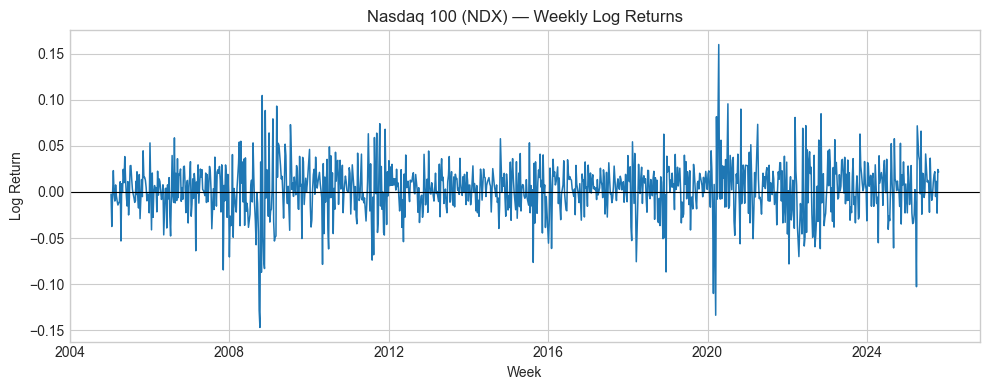

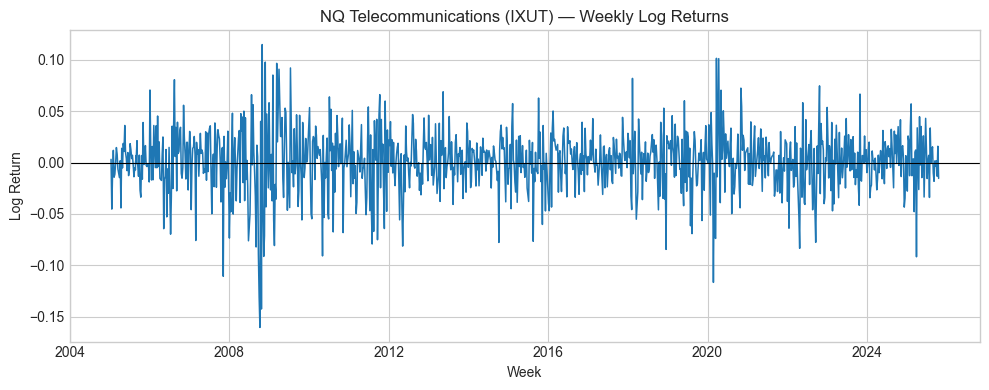

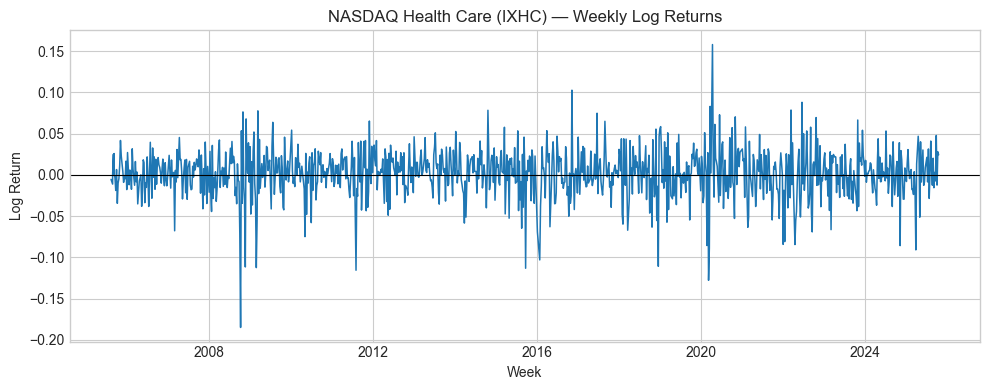

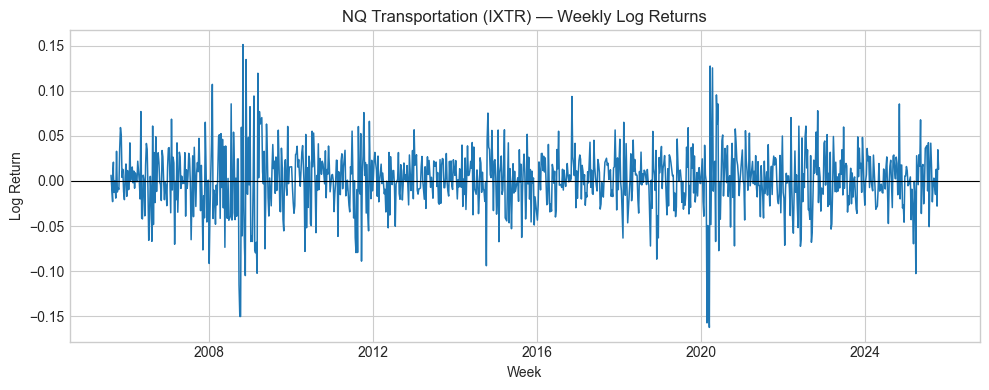

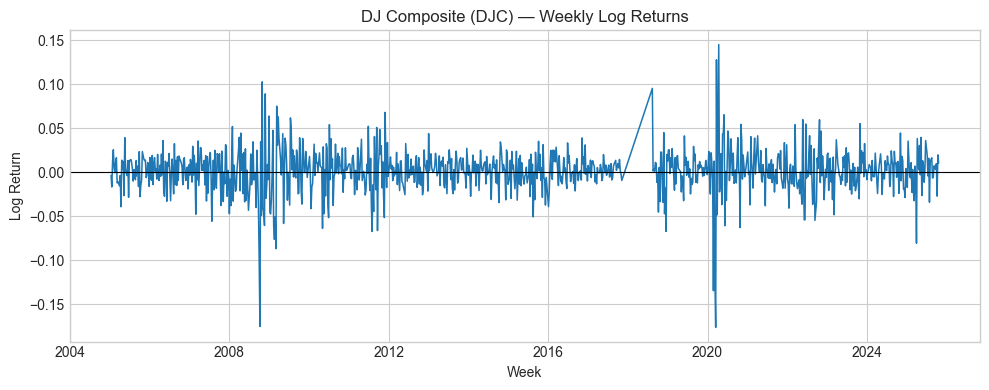

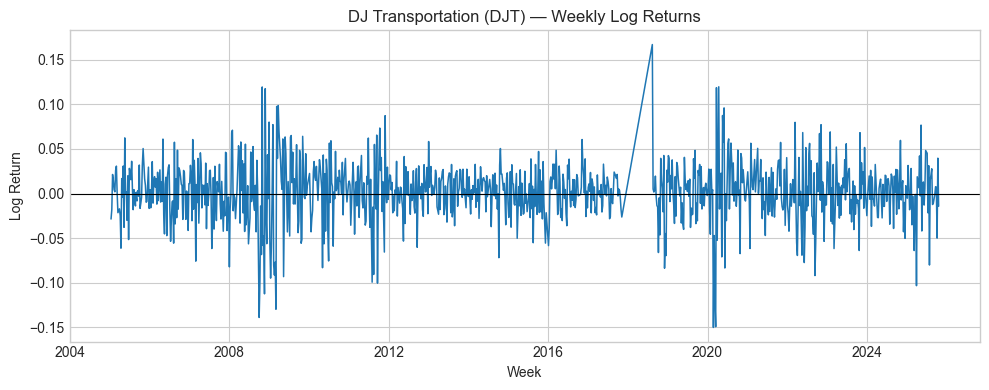

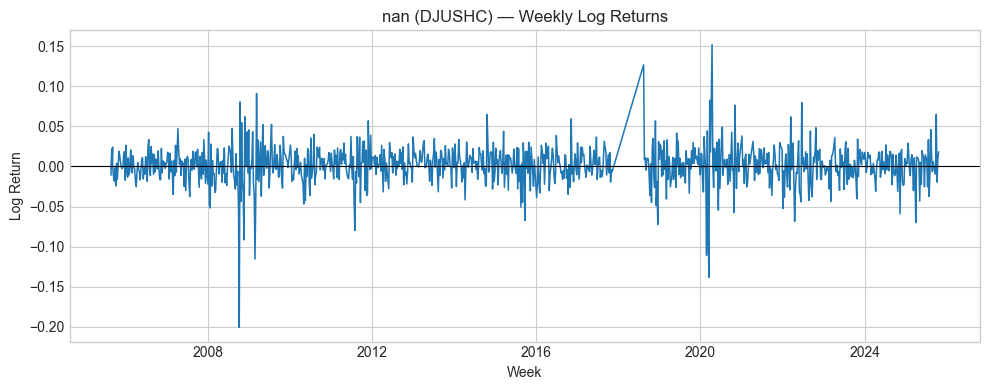

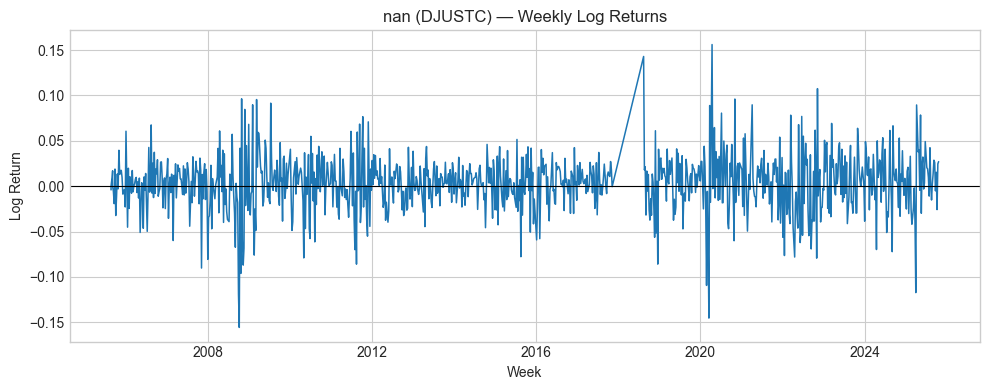

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === deine Weekly-Tabelle ===
# z.B.: us_weekly = friday_df[['Indexcd','IndexName','Date','Clsidx']].copy()
us_weekly = friday_df[['Indexcd','IndexName','Date','Clsidx']].copy()

# YYYY-WW -> Jahr/Woche -> Wochenstart (Montag)
us_weekly[['Year','Week']] = us_weekly['Date'].astype(str).str.split('-', expand=True).astype(int)
us_weekly['WeekStart'] = us_weekly.apply(
    lambda r: pd.Timestamp.fromisocalendar(int(r['Year']), int(r['Week']), 1), axis=1
)

# sortieren & Log-Returns je Index
us_weekly = us_weekly.sort_values(['Indexcd','Year','Week'])
us_weekly['Clsidx'] = pd.to_numeric(us_weekly['Clsidx'], errors='coerce')
us_weekly['LogReturn'] = np.log(us_weekly['Clsidx']).groupby(us_weekly['Indexcd']).diff()

# ===== Plot der wöchentlichen Log-Returns pro ausgewähltem Index =====
codes = ['NDX','IXUT','IXHC','IXTR','DJC','DJT','DJUSHC','DJUSTC']   # anpassen
plt.style.use('seaborn-v0_8-whitegrid')
for code in codes:
    sub = us_weekly[us_weekly['Indexcd'] == code].dropna(subset=['LogReturn'])
    if sub.empty: 
        continue
    name = sub['IndexName'].iloc[0]
    plt.figure(figsize=(10,4))
    plt.plot(sub['WeekStart'], sub['LogReturn'], linewidth=1.1)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.title(f"{name} ({code}) — Weekly Log Returns")
    plt.xlabel("Week"); plt.ylabel("Log Return")
    plt.tight_layout(); plt.show()



In [85]:
import pandas as pd

# DJUSTC isolieren
sub = friday_df[friday_df['Indexcd'] == 'DJUSTC'].copy()
sub['Trddt'] = pd.to_datetime(sub['Date'], errors='coerce')
sub = sub.sort_values('Trddt').reset_index(drop=True)

# Gap-Infos berechnen
sub['prev_date'] = sub['Trddt'].shift(1)
sub['gap_days']  = (sub['Trddt'] - sub['prev_date']).dt.days
sub['missing_weeks_est'] = (sub['gap_days'] // 7) - 1  # grobe Schätzung: wie viele Wochen fehlen zwischen zwei Punkten

# Nur ab 2016 und nur „große“ Lücken anzeigen (z.B. > 10 Tage)
mask = (sub['Trddt'] >= pd.Timestamp('2016-01-01')) & (sub['gap_days'] > 10)
gaps_2016 = sub.loc[mask, ['prev_date','Trddt','gap_days','missing_weeks_est']].rename(
    columns={'prev_date':'from', 'Trddt':'to'}
).reset_index(drop=True)

print("📉 Große Zeitlücken (>10 Tage) für DJUSTC ab 2016:")
display(gaps_2016.head(20))
print(f"Gefundene Lücken: {len(gaps_2016)}")



📉 Große Zeitlücken (>10 Tage) für DJUSTC ab 2016:


/var/folders/wp/k5t4pl853ng8y6kktqkmy3n80000gn/T/ipykernel_72061/28694551.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sub['Trddt'] = pd.to_datetime(sub['Date'], errors='coerce')


,from,to,gap_days,missing_weeks_est
0,2015-12-01,2016-01-01,31.0,3.0
1,2016-01-01,2016-02-01,31.0,3.0
2,2016-02-01,2016-03-01,29.0,3.0
3,2016-03-01,2016-04-01,31.0,3.0
4,2016-04-01,2016-05-01,30.0,3.0
5,2016-05-01,2016-06-01,31.0,3.0
6,2016-06-01,2016-07-01,30.0,3.0
7,2016-07-01,2016-08-01,31.0,3.0
8,2016-08-01,2016-09-01,31.0,3.0
9,2016-09-01,2016-10-01,30.0,3.0


Gefundene Lücken: 106


In [59]:
us_weekly.head()

,Indexcd,IndexName,Date,Clsidx,Year,Week,WeekStart,LogReturn
9245,.DJU,NaN,2005-34,399.90,2005,34,2005-08-22,NaN
12424,.DJU,NaN,2005-35,416.23,2005,35,2005-08-29,0.040023
15674,.DJU,NaN,2005-36,421.05,2005,36,2005-09-05,0.011514
7271,A1BSC,NaN,2005-33,190.19,2005,33,2005-08-15,NaN
8731,A1BSC,NaN,2005-34,186.46,2005,34,2005-08-22,-0.019807


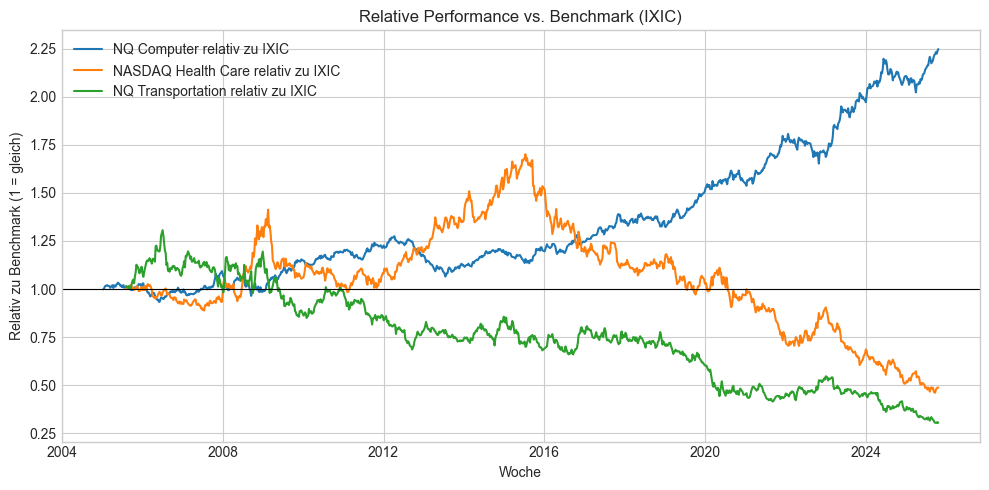

['IXHC' 'IXIC' 'IXK' 'IXTR']
NDX Wochen: 0 (von 1050 Gesamt)
Index(['IXHC', 'IXIC', 'IXK', 'IXTR'], dtype='object', name='Indexcd')
Fehlende Werte für NDX: 0


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === NASDAQ-Subindizes auswählen ===
codes = ['IXIC', 'IXK', 'IXHC', 'IXTR']  # Nasdaq 100, Telecommunications, Health Care, Transportation
bench = 'IXIC'  # Benchmark: Nasdaq 100

# --- Daten vorbereiten ---
df = friday_df[friday_df['Indexcd'].isin(codes)].copy()
df['Clsidx'] = pd.to_numeric(df['Clsidx'], errors='coerce')
df.loc[df['Clsidx'] <= 0, 'Clsidx'] = np.nan

# Falls Year und Week noch nicht existieren → aus Date (YYYY-WW) extrahieren
if 'Year' not in df or 'Week' not in df:
    df[['Year','Week']] = df['Date'].astype(str).str.split('-', expand=True).astype(int)

# Wochendatum (Montag jeder ISO-Woche)
df['WeekStart'] = df.apply(lambda r: pd.Timestamp.fromisocalendar(int(r['Year']), int(r['Week']), 1), axis=1)
df = df.sort_values(['Indexcd','WeekStart'])

# --- Logarithmierte Returns ---
df['LogReturn'] = np.log(df['Clsidx']).groupby(df['Indexcd']).diff()

# --- Aggregieren (falls Duplikate in gleicher Woche vorhanden) ---
pivot = (
    df.groupby(['Indexcd','WeekStart'])['LogReturn'].mean()
      .unstack('Indexcd')
      .sort_index()
)

# Nur Wochen behalten, in denen Benchmark vorhanden ist
pivot = pivot.dropna(subset=[bench])

# --- Relative Performance: exp(cumsum(Subindex - Benchmark)) ---
rel = {}
names = {}
for code in codes:
    if code == bench or code not in pivot.columns:
        continue
    pair = pivot[[bench, code]].dropna()  # gemeinsame Wochen
    ex_ret = (pair[code] - pair[bench]).cumsum()
    rel_series = np.exp(ex_ret)
    rel[code] = rel_series
    # Indexnamen übernehmen
    if not df.loc[df['Indexcd']==code, 'IndexName'].dropna().empty:
        names[code] = df.loc[df['Indexcd']==code, 'IndexName'].dropna().iloc[0]
    else:
        names[code] = code

# --- Plot ---
plt.figure(figsize=(10,5))
for code, series in rel.items():
    plt.plot(series.index, series.values, label=f"{names[code]} relativ zu {bench}")
plt.axhline(1.0, color='black', linewidth=0.8)
plt.title(f"Relative Performance vs. Benchmark ({bench})")
plt.ylabel("Relativ zu Benchmark (1 = gleich)")
plt.xlabel("Woche")
plt.legend()
plt.tight_layout()
plt.show()

# 1️⃣ Prüfen, ob NDX im DataFrame vorhanden ist
print(df['Indexcd'].unique())

# 2️⃣ Prüfen, wie viele Wochen NDX-Daten hat
ndx = df[df['Indexcd'] == 'NDX']
print(f"NDX Wochen: {ndx['WeekStart'].nunique()} (von {df['WeekStart'].nunique()} Gesamt)")

# 3️⃣ Prüfen, ob der pivot NDX überhaupt enthält
print(pivot.columns)
print("Fehlende Werte für NDX:", pivot['IXIC'].isna().sum())


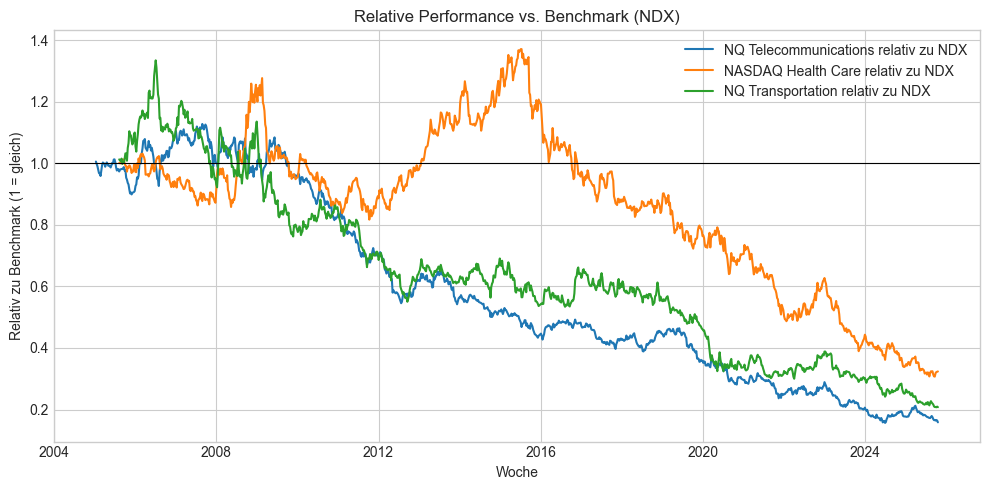

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Dow Jones Indizes ===
codes = ['NDX', 'IXUT', 'IXHC', 'IXTR']  # Nasdaq 100, Telecommunications, Health Care, Transportation
bench = 'NDX'

# --- Daten vorbereiten ---
df = friday_df[friday_df['Indexcd'].isin(codes)].copy()
df['Clsidx'] = pd.to_numeric(df['Clsidx'], errors='coerce')
df.loc[df['Clsidx'] <= 0, 'Clsidx'] = np.nan

# Year/Week aus Date (YYYY-WW) ableiten (falls noch nicht vorhanden)
if 'Year' not in df.columns or 'Week' not in df.columns:
    df[['Year','Week']] = df['Date'].astype(str).str.split('-', expand=True).astype(int)

# Wochendatum (Montag jeder ISO-Woche)
df['WeekStart'] = df.apply(lambda r: pd.Timestamp.fromisocalendar(int(r['Year']), int(r['Week']), 1), axis=1)
df = df.sort_values(['Indexcd','WeekStart'])

# --- Wöchentliche Log-Returns ---
df['LogReturn'] = np.log(df['Clsidx']).groupby(df['Indexcd']).diff()

# --- Aggregation, falls es Duplikate je (Indexcd, WeekStart) gibt ---
pivot = (
    df.groupby(['Indexcd','WeekStart'])['LogReturn'].mean()
      .unstack('Indexcd')
      .sort_index()
)

# Nur Wochen behalten, in denen der Benchmark vorhanden ist
pivot = pivot.dropna(subset=[bench])

# --- Relative Performance: exp(cumsum(Subindex - Benchmark)) ---
rel = {}
names = {}
for code in codes:
    if code == bench or code not in pivot.columns:
        continue
    pair = pivot[[bench, code]].dropna()  # gemeinsame Wochen
    if pair.empty:
        continue
    ex_ret = (pair[code] - pair[bench]).cumsum()
    rel[code] = np.exp(ex_ret)            # Start = 1
    nm = df.loc[df['Indexcd']==code, 'IndexName']
    names[code] = (nm.dropna().iloc[0] if not nm.dropna().empty else code)

# --- Plot ---
plt.figure(figsize=(10,5))
for code, series in rel.items():
    plt.plot(series.index, series.values, label=f"{names[code]} relativ zu {bench}")
plt.axhline(1.0, color='black', linewidth=0.8)
plt.title(f"Relative Performance vs. Benchmark ({bench})")
plt.ylabel("Relativ zu Benchmark (1 = gleich)")
plt.xlabel("Woche")
plt.legend()
plt.tight_layout()
plt.show()


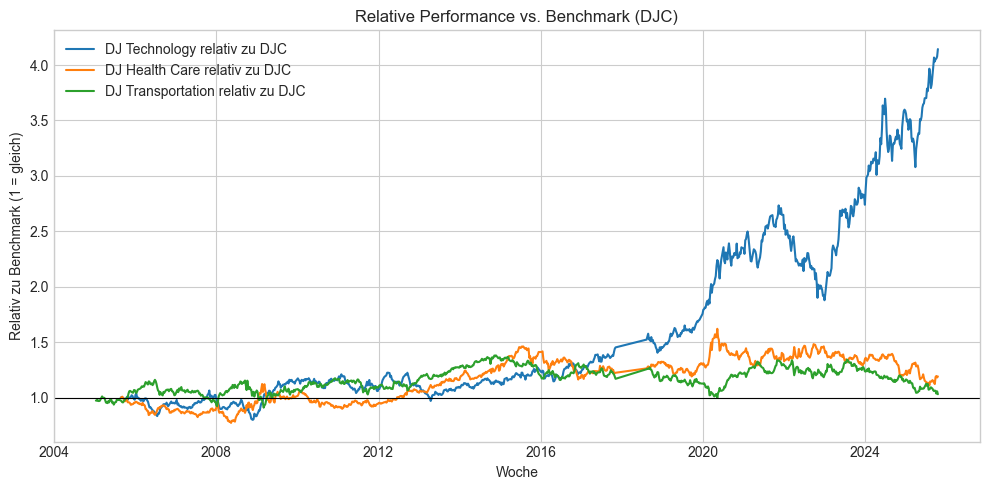

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Dow Jones Indizes ===
codes = ['DJC', 'DJUSTC', 'DJUSHC', 'DJT']   # Benchmark + Subindizes
bench = 'DJC'                                # Benchmark: Dow Jones Composite

# --- Daten vorbereiten ---
df = friday_df[friday_df['Indexcd'].isin(codes)].copy()
df['Clsidx'] = pd.to_numeric(df['Clsidx'], errors='coerce')
df.loc[df['Clsidx'] <= 0, 'Clsidx'] = np.nan

# Year/Week aus Date (YYYY-WW) ableiten (falls noch nicht vorhanden)
if 'Year' not in df.columns or 'Week' not in df.columns:
    df[['Year','Week']] = df['Date'].astype(str).str.split('-', expand=True).astype(int)

# Wochendatum (Montag jeder ISO-Woche)
df['WeekStart'] = df.apply(lambda r: pd.Timestamp.fromisocalendar(int(r['Year']), int(r['Week']), 1), axis=1)
df = df.sort_values(['Indexcd','WeekStart'])

# --- Wöchentliche Log-Returns ---
df['LogReturn'] = np.log(df['Clsidx']).groupby(df['Indexcd']).diff()

# --- Aggregation, falls es Duplikate je (Indexcd, WeekStart) gibt ---
pivot = (
    df.groupby(['Indexcd','WeekStart'])['LogReturn'].mean()
      .unstack('Indexcd')
      .sort_index()
)

# Nur Wochen behalten, in denen der Benchmark vorhanden ist
pivot = pivot.dropna(subset=[bench])

# --- Relative Performance: exp(cumsum(Subindex - Benchmark)) ---
rel = {}
names = {}
for code in codes:
    if code == bench or code not in pivot.columns:
        continue
    pair = pivot[[bench, code]].dropna()  # gemeinsame Wochen
    if pair.empty:
        continue
    ex_ret = (pair[code] - pair[bench]).cumsum()
    rel[code] = np.exp(ex_ret)            # Start = 1
    nm = df.loc[df['Indexcd']==code, 'IndexName']
    names[code] = (nm.dropna().iloc[0] if not nm.dropna().empty else code)

# --- Plot ---
plt.figure(figsize=(10,5))
for code, series in rel.items():
    plt.plot(series.index, series.values, label=f"{names[code]} relativ zu {bench}")
plt.axhline(1.0, color='black', linewidth=0.8)
plt.title(f"Relative Performance vs. Benchmark ({bench})")
plt.ylabel("Relativ zu Benchmark (1 = gleich)")
plt.xlabel("Woche")
plt.legend()
plt.tight_layout()
plt.show()


In [92]:
nasdaq_composite_df.head()

,Indexcd,IndexName,Date,Clsidx
49,IXUT,NQ Telecommunications,2005-01,191.90
51,IXIS,NQ Insurance,2005-01,3285.48
52,IXF,NQ Financial 100,2005-01,2766.90
57,NBI,NQ Biotechnology,2005-01,742.54
70,IXK,NQ Computer,2005-01,924.84


In [95]:
import pandas as pd

# Helper-Funktion: ISO-Jahr/Woche → tatsächlicher Freitag (Wochentag=5)
def iso_yearweek_to_friday(y, w):
    return pd.Timestamp.fromisocalendar(int(y), int(w), 5)

# === USA: Nasdaq Composite (Indexcd = IXIC) ===
us = friday_df.loc[friday_df['Indexcd'] == 'IXIC', ['Date', 'Clsidx']].dropna().copy()

# Spalte Date ("YYYY-WW") in Jahr/Woche zerlegen → echtes Datum (Freitag)
us[['Year', 'Week']] = us['Date'].astype(str).str.split('-', expand=True).astype(int)
us['Date'] = us.apply(lambda r: iso_yearweek_to_friday(r['Year'], r['Week']), axis=1)

# Einheitliche Spalten und Sortierung
us = us[['Date', 'Clsidx']].rename(columns={'Clsidx': 'Close'}).sort_values('Date').drop_duplicates('Date')

# Speichern
us.to_csv('us_index.csv', index=False)
print(f"✅ us_index.csv gespeichert: {len(us)} Zeilen")
display(us.head())


✅ us_index.csv gespeichert: 1047 Zeilen


,Date,Close
85,2005-01-07,2088.61
253,2005-01-14,2087.91
427,2005-01-21,2034.27
647,2005-01-28,2035.83
794,2005-02-04,2086.66
